In [1]:
import numpy as np                
import pandas as pd               
import seaborn as sns             
import matplotlib.pyplot as plt   
import scipy.stats                
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
iris = pd.read_csv('/content/iris.csv')

In [3]:
print(iris.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


We have 150 entries, and for each entry we have information of the following physycal properties: Sepal Length, Sepal Width, Petal Length and Petal Width all of them measured in centimeters, and the Taxonomical classification of the species.

In [26]:
print(iris.shape)

(150, 5)


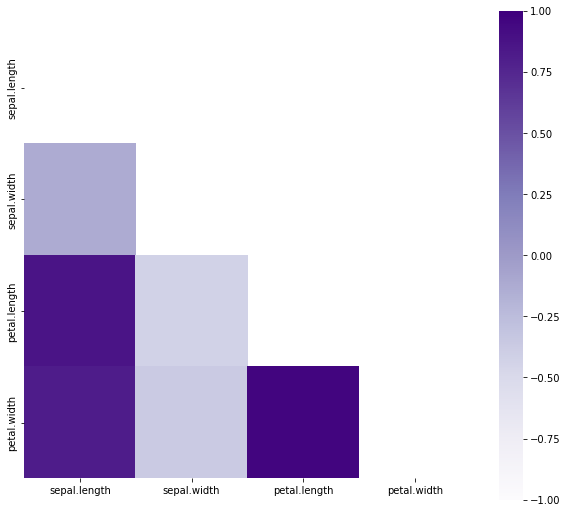

In [32]:
matcorr = iris.iloc[:, ~iris.columns.isin(['Id', 'Species' ])].corr()
mask = np.zeros_like(matcorr, dtype = np.bool)
mask[np.triu_indices_from( mask )] = True
f, ax = plt.subplots(figsize = ( 10, 9 ))
sns.heatmap(matcorr, mask = mask, cmap = 'Purples', vmin = -1, vmax = 1, center = 0, square = True);
plt.show()

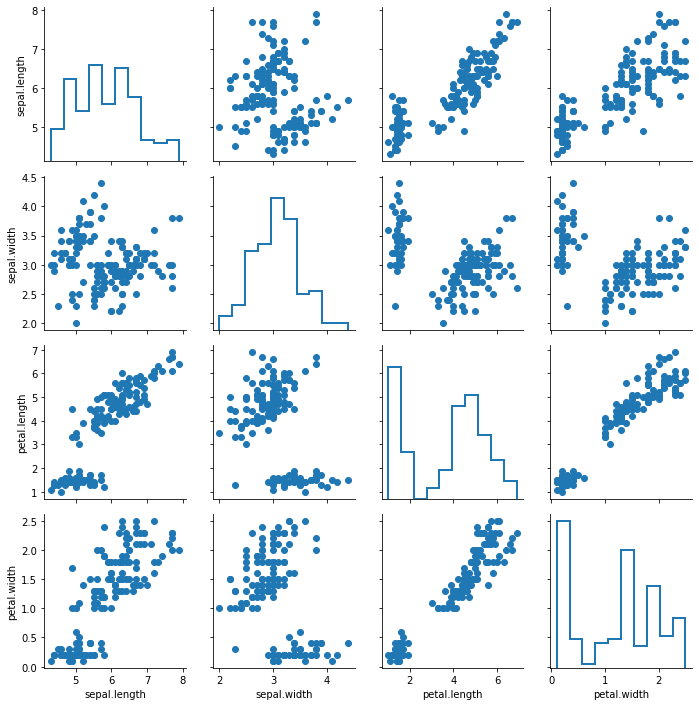

In [31]:
plot = sns.PairGrid(iris.loc[:, [ 'sepal.length', 'sepal.width', 'petal.length', 'petal.width' ]])
plot.map_diag(plt.hist, histtype = 'step', linewidth = 2)
plot.map_offdiag(plt.scatter)

Since we already know that there are individuals from three species in the sample, a priori it seems that there is a species that will by easily separated in one cluster whereas classifying the other two won't be so easy

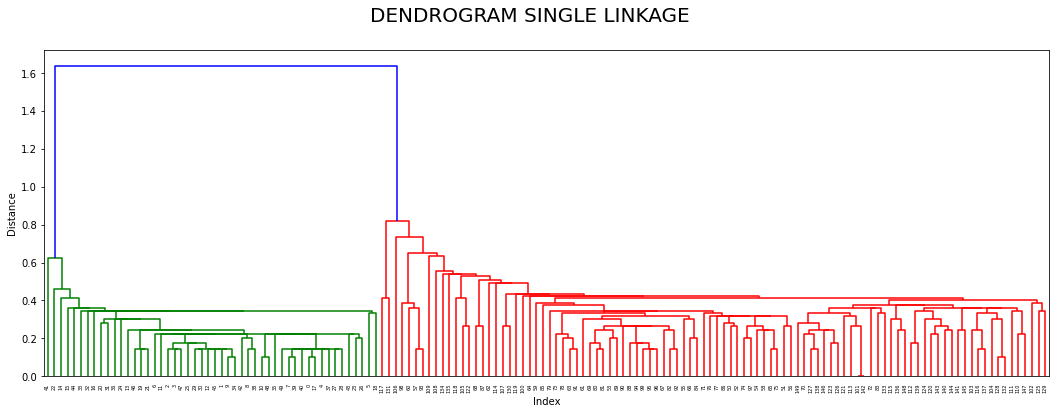

In [15]:
dist_sin = linkage(iris.loc[:, ['sepal.length', 'sepal.width', 'petal.length', 'petal.width' ]], method = 'single' )
plt.figure(figsize = ( 18, 6 ))
dendrogram(dist_sin, leaf_rotation = 90 )
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle('DENDROGRAM SINGLE LINKAGE', fontsize = 20)
plt.show()

As expected, the resulting dendrogram using the 'single' suggest the existence of two clusters but it is not so clear the existence of a third one. If I didn't now that the dataser contains data from three species I would stop at two. But, I also would like to see how much the clusters differ from the taxonomical classification, so I also want to see what happens if a choose 3 clusters.


In [20]:
from scipy.cluster.hierarchy import fcluster
iris_SM = iris.copy()
iris_SM['2_clust'] = fcluster(dist_sin, 2, criterion = 'maxclust' )
iris_SM['3_clust'] = fcluster(dist_sin, 3, criterion = 'maxclust' )
iris_SM.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,2_clust,3_clust
0,5.1,3.5,1.4,0.2,Setosa,1,1
1,4.9,3.0,1.4,0.2,Setosa,1,1
2,4.7,3.2,1.3,0.2,Setosa,1,1
3,4.6,3.1,1.5,0.2,Setosa,1,1
4,5.0,3.6,1.4,0.2,Setosa,1,1


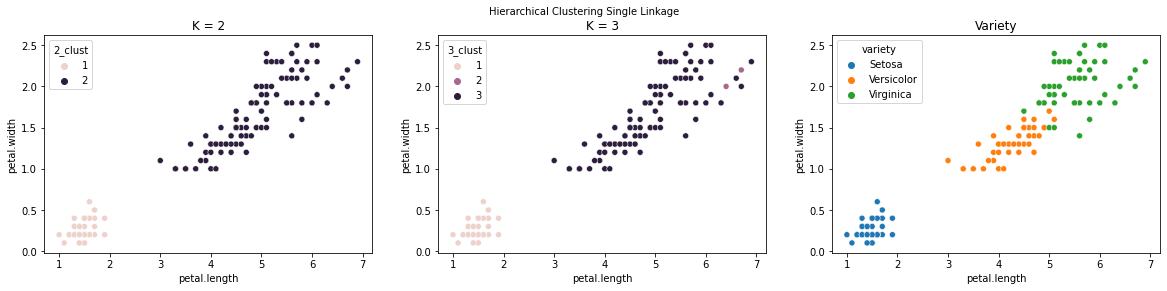

In [29]:
plt.figure(figsize = (20, 4 ))
plt.suptitle('Hierarchical Clustering Single Linkage', fontsize = 10)
plt.subplot(1, 3, 1)
plt.title('K = 2', fontsize = 12)
sns.scatterplot(x = 'petal.length', y = 'petal.width', data = iris_SM, hue = '2_clust' )

plt.subplot(1, 3, 2)
plt.title('K = 3', fontsize = 12)
sns.scatterplot(x = 'petal.length', y = 'petal.width', data = iris_SM, hue = '3_clust' )

plt.subplot(1, 3, 3)
plt.title('Variety', fontsize = 12)
sns.scatterplot(x = 'petal.length', y = 'petal.width', data = iris_SM, hue = 'variety' )

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


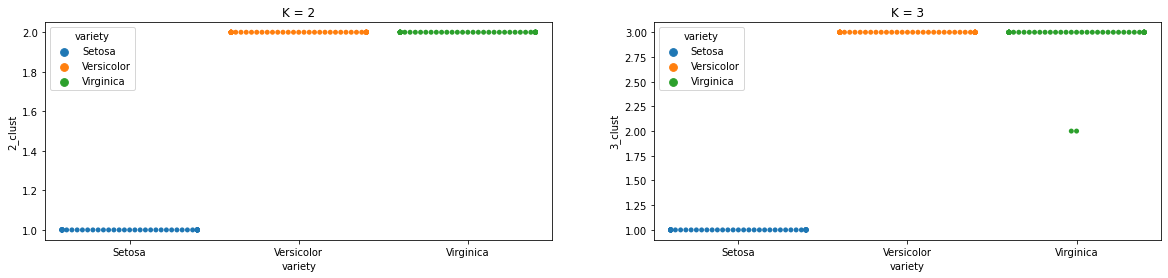

In [30]:
plt.figure(figsize = (20, 4))
plt.subplot(1, 2, 1)
plt.title('K = 2', fontsize = 12)
sns.swarmplot(x = 'variety' , y = '2_clust', data = iris_SM, hue = 'variety' )

plt.subplot(1, 2, 2)
plt.title('K = 3', fontsize = 12)
sns.swarmplot(x = 'variety' , y = '3_clust', data = iris_SM, hue = 'variety' )

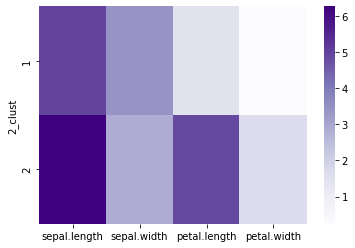

In [10]:
sns.heatmap(iris_SM.loc[:,['sepal.length', 'sepal.width', 'petal.length', 'petal.width', '2_clust' ]].groupby(['2_clust']).mean(), cmap = 'Purples' )

*   Cluster 1: Small petals and thick Sepals
*   Cluster 2: Long Petals and Long Sepals

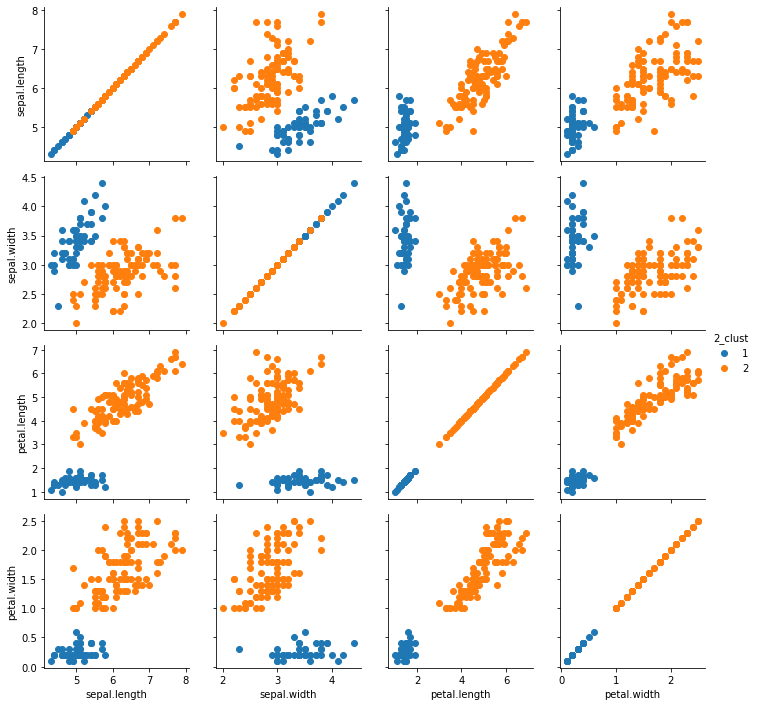

In [23]:
plot = sns.PairGrid(iris_SM, vars = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width' ], hue = '2_clust' )
plot.map(plt.scatter)
plot.add_legend()